<a href="https://colab.research.google.com/github/AketzalliG/docs/blob/master/L05_Red_Neuronal_Densa_TF_Weather_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RED NEURONAL DENSA**
# Weather History

**PASO 1.-** Importar las librerias

In [6]:
# Paquetería básica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras

# Funcionalidades básicas de Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

**PASO 2.-** Descargar el archivo y cargar datos

In [7]:
 !wget 'https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/weatherHistory.csv'

--2025-10-04 16:58:37--  https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/weatherHistory.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/weatherHistory.csv [following]
--2025-10-04 16:58:37--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv.1’

weatherHistory.csv. 100%[===================>]  15.54M  46.4MB/s    in 0.3s    

In [8]:
dataset = pd.read_csv('weatherHistory.csv')
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**PASO 3.-** Limpieza de datos y codificación

In [9]:
# Inspección inicial
dataset.info()
dataset.isnull().sum()

# Manejo de valores faltantes
dataset['Precip Type'].fillna(dataset['Precip Type'].mode()[0], inplace=True)
dataset['Summary'].fillna(dataset['Summary'].mode()[0], inplace=True)

dataset.isnull().sum().max()

# Codificación de la variable de fecha
dataset['Formatted Date'] = pd.to_datetime(dataset['Formatted Date'], utc=True)
dataset['Year'] = dataset['Formatted Date'].dt.year
dataset['Month'] = dataset['Formatted Date'].dt.month
dataset['Hour'] = dataset['Formatted Date'].dt.hour
dataset = dataset.drop(columns=['Formatted Date'])

# Codificación de las variables categoricas
categorical_cols = ['Summary', 'Precip Type', 'Daily Summary']
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

# Eliminar columnas no deseadas
if 'Loud Cover' in dataset.columns:
    dataset = dataset.drop(columns=['Loud Cover'])

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


/tmp/ipython-input-1151436769.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Precip Type'].fillna(dataset['Precip Type'].mode()[0], inplace=True)
/tmp/ipython-input-1151436769.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Columns: 250 entries, Temperature (C) to Daily Summary_Windy in the afternoon.
dtypes: bool(240), float64(7), int32(3)
memory usage: 28.3 MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month,Hour,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,22,...,False,False,False,False,False,False,False,False,False,False
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,23,...,False,False,False,False,False,False,False,False,False,False
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,0,...,False,False,False,False,False,False,False,False,False,False
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,...,False,False,False,False,False,False,False,False,False,False
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,2,...,False,False,False,False,False,False,False,False,False,False


**PASO 4.-** Elegir las variables de entrada y salida

In [10]:
# La variable de salida (y) es la variable de interés (Visibility (km))
y = dataset['Visibility (km)']

# Las variables de entrada (X) son todas las demás variables
x = dataset.drop(columns=['Visibility (km)'])

print(x.shape)
print(y.shape)

(96453, 249)
(96453,)


**PASO 5.-** Normalizar y particionar el conjunto de datos

In [11]:
# Normalizacion de los datos de entrada (x)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Particion del conjunto de datos
x_train, x_test, y_train, y_test = train_test_split(x_normalized,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(x_train.shape)
print(x_test.shape)

(77162, 249)
(19291, 249)


**PASO 6.-** Diseñar una red neuronal

In [13]:
def build_model():
  model = keras.Sequential()

  # Capa de entrada y primera capa oculta
  model.add(keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(keras.layers.Dropout(0.1))

  # Segunda capa oculta
  model.add(keras.layers.Dense(32, activation='tanh'))

  # Capa de salida para Regresión
  model.add(keras.layers.Dense(1, activation='linear'))

  # Compilación del modelo
  model.compile(loss='mse',
                optimizer=keras.optimizers.Adam(),
                metrics=['mae'])

  return model

model = build_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,113 (70.75 KB)

 Trainable params: 18,113 (70.75 KB)

 Non-trainable params: 0 (0.00 B)

**PASO 7.-** Entrenar la red neuronal y dibujar las graficas de evolución de entrenamiento

Epoch 1/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.7459 - mae: 1.3458 - val_loss: 4.0633 - val_mae: 1.3771
Epoch 2/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 3.7548 - mae: 1.3415 - val_loss: 4.0869 - val_mae: 1.3797
Epoch 3/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.7154 - mae: 1.3398 - val_loss: 4.0656 - val_mae: 1.3737
Epoch 4/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.7310 - mae: 1.3388 - val_loss: 4.0850 - val_mae: 1.3753
Epoch 5/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.7645 - mae: 1.3458 - val_loss: 4.0692 - val_mae: 1.3686
Epoch 6/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.6741 - mae: 1.3319 - val_loss: 4.0256 - val_mae: 1.3647
Epoch 7/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.7173 - mae: 1.3364 - val_loss: 4.0123 - val_mae: 1.3698
Epoch 8/100
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.7368 - mae: 1.3366 - val_loss: 4.0624 - val_mae: 1.3653
Epoch 9/100
2412/2412 ━━━━━━━━━━

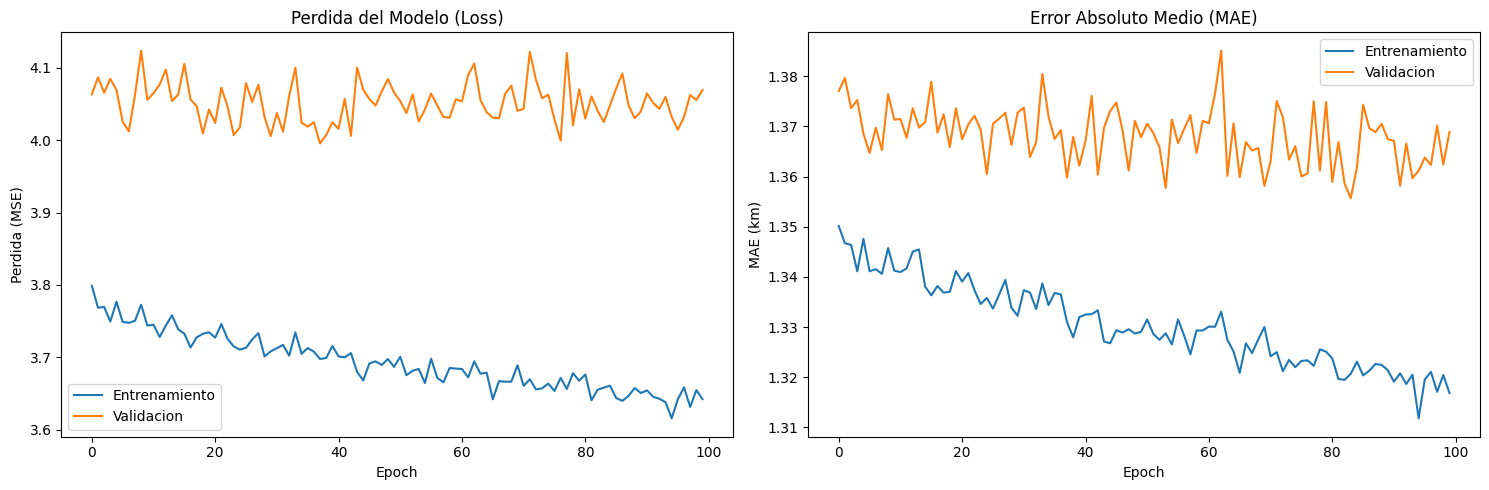

In [15]:
# Entrenar el modelo
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Dibujar las curvas de aprendizaje
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(15, 5))

  # Grafico de perdida (Loss)
  plt.subplot(1, 2, 1)
  plt.title('Perdida del Modelo (Loss)')
  plt.xlabel('Epoch')
  plt.ylabel('Perdida (MSE)')
  plt.plot(hist['epoch'], hist['loss'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_loss'], label='Validacion')
  plt.legend()

  # Grafico del Error
  plt.subplot(1, 2, 2)
  plt.title('Error Absoluto Medio (MAE)')
  plt.xlabel('Epoch')
  plt.ylabel('MAE (km)')
  plt.plot(hist['epoch'], hist['mae'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mae'], label='Validacion')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_history(history)


**PASO 8.-** Implementación de Early Stopping como regulador

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 16.8642 - mae: 3.0928 - val_loss: 7.7729 - val_mae: 2.3505
Epoch 2/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.2122 - mae: 2.2109 - val_loss: 6.1060 - val_mae: 1.9523
Epoch 3/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.9449 - mae: 1.8977 - val_loss: 5.3976 - val_mae: 1.7550
Epoch 4/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.4222 - mae: 1.7505 - val_loss: 5.2182 - val_mae: 1.6987
Epoch 5/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.2660 - mae: 1.7110 - val_loss: 5.0713 - val_mae: 1.6671
Epoch 6/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.1472 - mae: 1.6725 - val_loss: 4.9495 - val_mae: 1.6177
Epoch 7/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 4.9341 - mae: 1.6281 - val_loss: 4.9244 - val_mae: 1.6013
Epoch 8/1000
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.8632 - mae: 1.6102 - val_loss: 4.7547 - val_mae: 1.5738
Epoch 9/1000
2412/2412

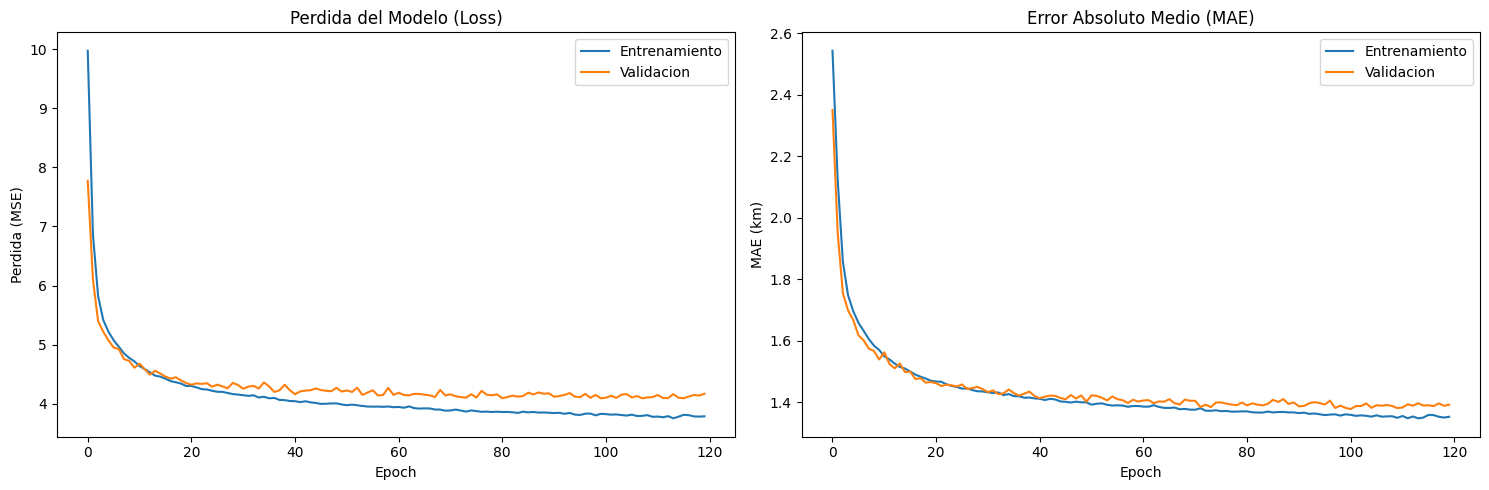

In [16]:
# Crear la instacia de EarlyStopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=20,
                                   verbose=1,
                                   restore_best_weights=True)

# Costruir el modelo optimizado
model_optimized = build_model()

# Entrenar el modelo
history_optimized = model_optimized.fit(x_train,
                                        y_train,
                                        epochs=1000,
                                        batch_size=32,
                                        validation_data=(x_test, y_test),
                                        callbacks=[es],
                                        verbose=1)

# Dibujar las curvas de aprendizaje
plot_history(history_optimized)

**PASO 9.-** Cálculo de Métricas

In [17]:
# Importar las librerías necesarias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = model_optimized.predict(x_test)

# Extraer las etiquetas verdaderas del conjunto de prueba
y_true = np.asanyarray(y_test)

# Calcular las métricas de desempeño
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# 4. Mostrar las métricas
print("\n--- Métricas de Desempeño del Modelo de Regresión para Visibilidad ---")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f} km")
print(f"Error Absoluto Medio (MAE): {mae:.4f} km")
print(f"Coeficiente de Determinación (R² Score): {r2:.4f}")

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Métricas de Desempeño del Modelo de Regresión para Visibilidad ---
Error Cuadrático Medio (MSE): 4.0911
Raíz del Error Cuadrático Medio (RMSE): 2.0227 km
Error Absoluto Medio (MAE): 1.3810 km
Coeficiente de Determinación (R² Score): 0.7687
